In [73]:
import pickle
import numpy as np
import torch
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#load achilles sample
sample = pd.read_csv('./data/sample_info.csv')

In [3]:
column = sample[['DepMap_ID','primary_disease','lineage_molecular_subtype']]

In [4]:
breast_cancer = column[(column['primary_disease'] == 'Breast Cancer')]

In [5]:
breast_cancer = breast_cancer.fillna(0)

In [6]:
fillna = breast_cancer[(breast_cancer['lineage_molecular_subtype']== 0)]

In [7]:
breast_cancer = breast_cancer.drop(fillna.index)

In [8]:
cell_line = breast_cancer['DepMap_ID'].tolist()

In [472]:
#laod achilles gene
gene_effect = pd.read_csv('./data/Achilles_gene_effect.csv',index_col=0)

In [10]:
bc_sample = gene_effect.reindex(cell_line)

In [11]:
bc_sample = bc_sample[['ERBB2 (2064)','ESR1 (2099)']].dropna()

In [12]:
bc_sample

,ERBB2 (2064),ESR1 (2099)
DepMap_ID,,
ACH-000017,-1.265227,-0.016796
ACH-000019,-0.159680,-1.178090
ACH-000028,-0.180980,-0.811218
ACH-000097,-0.696371,-0.600623
ACH-000111,-0.164745,-0.046832
ACH-000148,-0.136770,-0.000469
ACH-000212,-0.159076,-0.025404
ACH-000223,-0.120979,-0.086975
ACH-000248,-1.075530,-0.205576


In [17]:
subtype = breast_cancer[breast_cancer['lineage_molecular_subtype'].isin (['HER2_amp','luminal','basal','basal_A','basal_B','luminal_HER2_amp'])]

In [18]:
subtype = subtype.set_index(subtype['DepMap_ID'])

In [21]:
subtype['ERBB2'] = bc_sample['ERBB2 (2064)']

In [22]:
subtype['ESR1'] = bc_sample['ESR1 (2099)']

In [24]:
subtype = subtype.dropna().drop(['primary_disease','DepMap_ID'],axis=1)

In [473]:
basal = subtype[subtype['lineage_molecular_subtype'].isin(['basal','basal_A','basal_B','luminal_HER2_amp'])].index.tolist()
her2 = subtype[subtype['lineage_molecular_subtype'].isin(['HER2_amp'])].index.tolist()
luminal = subtype[subtype['lineage_molecular_subtype'].isin(['luminal'])].index.tolist()

In [27]:
subtype.loc[basal,'lineage_molecular_subtype'] = 'basal'

In [28]:
subtype

,lineage_molecular_subtype,ERBB2,ESR1
DepMap_ID,,,
ACH-000017,HER2_amp,-1.265227,-0.016796
ACH-000019,luminal,-0.159680,-1.178090
ACH-000028,luminal,-0.180980,-0.811218
ACH-000097,luminal,-0.696371,-0.600623
ACH-000111,basal,-0.164745,-0.046832
ACH-000148,basal,-0.136770,-0.000469
ACH-000212,basal,-0.159076,-0.025404
ACH-000223,basal,-0.120979,-0.086975
ACH-000248,HER2_amp,-1.075530,-0.205576


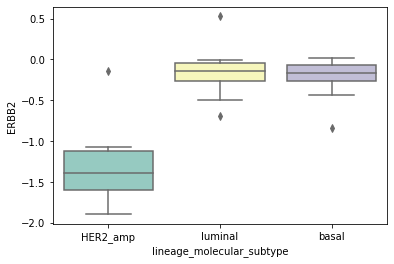

In [29]:
ax = sns.boxplot(x="lineage_molecular_subtype", y="ERBB2",data=subtype, palette="Set3")

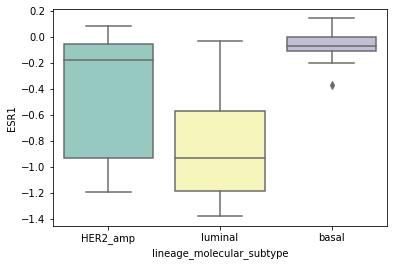

In [30]:
ax = sns.boxplot(x="lineage_molecular_subtype", y="ESR1",data=subtype, palette="Set3")

In [382]:
with open('basal.pkl','rb') as f:
    basal_act = pickle.load(f)

In [474]:
with open('netics_node_mapping.pkl','rb') as f:
    mapping = pickle.load(f)

In [475]:
keymap = []
for i in mapping.keys():
    keymap.append(i)

In [476]:
len(keymap)

6016

In [477]:
col = []
for i in gene_effect.columns.tolist():
    col.append(i.split(" ")[0])

In [478]:
gene_effect.columns = col

In [479]:
gene_effect = gene_effect.loc[:,keymap]

In [480]:
gene_eff_df = pd.DataFrame(gene_effect.loc[basal,:].mean(0))

In [481]:
basal_df = pd.DataFrame(basal_act).T

In [482]:
basal_df[1] = keymap

In [483]:
basal_df = basal_df.set_index(1)

In [484]:
concat = pd.concat([gene_eff_df, basal_df],axis=1)

In [485]:
concatna = concat.dropna()

In [486]:
corr = concatna.corr(method='pearson')
print(corr)

          0         0
0  1.000000 -0.013032
0 -0.013032  1.000000


In [487]:
with open('her2.pkl','rb') as f:
    her2_act = pickle.load(f)

In [488]:
her2_act.shape

(1, 6016)

In [489]:
gene_eff_her2 = pd.DataFrame(gene_effect.loc[her2,:].mean(0))

In [463]:
her2_df = pd.DataFrame(her2_act).T

In [492]:
her2_df[1] = keymap

In [493]:
her2_df = her2_df.set_index(1)

In [494]:
concat_her2 = pd.concat([gene_eff_her2, her2_df],axis=1)

In [495]:
concat_her2na = concat_her2.dropna()

In [496]:
corr = concat_her2na.corr(method='pearson')
print(corr)

          0         0
0  1.000000  0.006704
0  0.006704  1.000000


In [422]:
with open('luminal.pkl','rb') as f:
    luminal_act = pickle.load(f)

In [423]:
gene_eff_luminal = pd.DataFrame(gene_effect.loc[luminal,:].mean(0))

In [424]:
luminal_df = pd.DataFrame(luminal_act).T

In [425]:
luminal_df[1] = keymap

In [426]:
luminal_df = luminal_df.set_index(1)

In [427]:
concat_luminal = pd.concat([gene_eff_luminal, luminal_df],axis=1)

In [428]:
concat_luminalna = concat_luminal.dropna()

In [429]:
corr = concat_luminalna.corr(method='pearson')
print(corr)

          0         0
0  1.000000 -0.034269
0 -0.034269  1.000000


In [497]:
her2t = torch.tensor(her2_act)

In [498]:
her2t.mean()

tensor(0.1872)

In [499]:
her2top10 = torch.topk(her2t,10).indices.tolist()
her2top10v = torch.topk(her2t,10).values.tolist()

In [500]:
her2top10

[[1979, 1989, 1995, 1546, 1142, 2586, 5637, 2945, 3001, 1970]]

In [501]:
her2top10v

[[310.9587097167969,
  80.24130249023438,
  53.54385757446289,
  22.75416374206543,
  17.732206344604492,
  13.899807929992676,
  11.136055946350098,
  10.886129379272461,
  10.450302124023438,
  9.510795593261719]]